In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
mnist_train = np.load('data/mnist_train.npy')
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
mnist_test = np.load('data/mnist_test.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

In [3]:
X_p, X_var = np.load('predictions/X_test.npy')
print(X_p.shape)
print(X_var.shape)
X_std = np.sqrt(X_var)

(10000, 10)
(10000, 10)


In [4]:
predictions = np.argmax(X_p, axis=-1)

In [5]:
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.9928


In [17]:
arg_sorted_p = np.argsort(X_p, axis=-1)
print(arg_sorted_p[0])
print(X_p[0])
print(X_std[0])
print(X_p[0][arg_sorted_p[0]])

highest_arg = arg_sorted_p[:, -1]
second_highest_arg = arg_sorted_p[:, -2]

highest_p = X_p[np.arange(len(X_p)), highest_arg]
second_highest_p  = X_p[np.arange(len(X_p)), second_highest_arg]
highest_p_std = X_std[np.arange(len(X_p)), highest_arg]

def R_acc(alpha=-1, beta=0, eps = 1):
    reject_img = highest_p - second_highest_p < eps * highest_p_std
#     print("Rejecting: {}".format(np.sum(reject_img)))
    alpha * np.sum(predictions == y_test)
    correct_accept = (y_test == predictions) & np.logical_not(reject_img)
    correct_reject = (y_test == predictions) & reject_img
    incorrect_accept = (y_test != predictions) & np.logical_not(reject_img)
    incorrect_reject = (y_test != predictions) & reject_img
#     print("Correct accept: {}".format(np.sum(correct_accept)))
#     print("Correct reject: {}".format(np.sum(correct_reject)))
#     print("Incorrect accept: {}".format(np.sum(incorrect_accept)))
#     print("Incorrect reject: {}".format(np.sum(incorrect_reject)))
    acc = (np.sum(correct_accept) + alpha * np.sum(incorrect_accept)) / len(y_test)
    return np.sum(correct_reject), np.sum(incorrect_accept), np.sum(incorrect_reject), acc

[4 6 8 5 2 0 1 9 3 7]
[1.11111543e-04 1.11113623e-04 1.11111118e-04 2.10415329e-04
 1.11111111e-04 1.11111113e-04 1.11111111e-04 9.98101360e-01
 1.11111111e-04 1.11622929e-04]
[0.01054036 0.01054046 0.01054034 0.01450417 0.01054034 0.01054034
 0.01054034 0.04353201 0.01054034 0.01056459]
[1.11111111e-04 1.11111111e-04 1.11111111e-04 1.11111113e-04
 1.11111118e-04 1.11111543e-04 1.11113623e-04 1.11622929e-04
 2.10415329e-04 9.98101360e-01]


[0, 0, 5, 7, 8, 10, 13, 15, 16, 19, 24, 27, 28, 28, 29, 32, 32, 32, 34, 37, 38, 39, 40, 41, 42, 42, 43, 44, 46, 47, 48, 48, 48, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 51, 51, 51, 51, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58]
[72, 72, 67, 65, 64, 62, 59, 57, 56, 53, 48, 45, 44, 44, 43, 40, 40, 40, 38, 35, 34, 33, 32, 31, 30, 30, 29, 28, 26, 25, 24, 24, 24, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14]


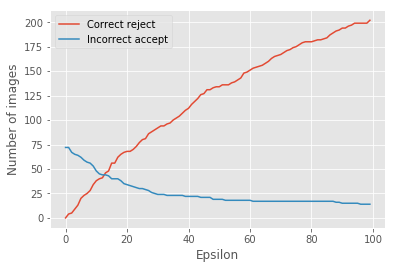

In [59]:
%matplotlib inline

r_accs = []
fns = [] # false negative: correct reject
fps = [] # false positive: incorrect accept
tps = []
for eps in np.linspace(0, 10, 100):
    fn, fp, tp, acc = R_acc(eps=eps)
    fns.append(fn)
    fps.append(fp)
    tps.append(tp)
    r_accs.append(acc)
print(tps)
print(fps)
plt.figure()
plt.plot(fns, label="Correct reject")
plt.plot(fps, label="Incorrect accept")
plt.xlabel("Epsilon")
plt.ylabel("Number of images")
plt.legend()

plt.savefig("figs/r_acc_mnist.png",bbox_inches='tight')

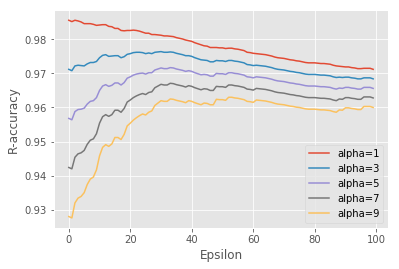

In [56]:
%matplotlib inline

plt.figure()

for alpha in np.arange(1, 10, 2):
    r_accs = []
    for eps in np.linspace(0, 10, 100):
        _,_,_, acc = R_acc(alpha=-alpha, eps=eps)
        r_accs.append(acc)
    plt.plot(r_accs, label="alpha={}".format(alpha))
plt.xlabel("Epsilon")
plt.ylabel("R-accuracy")
plt.legend()
plt.savefig("figs/r_accs_alpha_mnist.png",bbox_inches='tight')